In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

import pandas as pd
import numpy as np
import cv2


import seaborn as sns
import matplotlib.pyplot as plt
 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
model = Sequential()


input_shape = (128, 128, 3)
num_classes = 2 


model.add(Conv2D(32, # Number of Filters
                  kernel_size=(3, 3), # Size of the filter
                  strides = (1,1), # Stride, steps of the filter
                  activation='relu', # Activation Function
                  input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

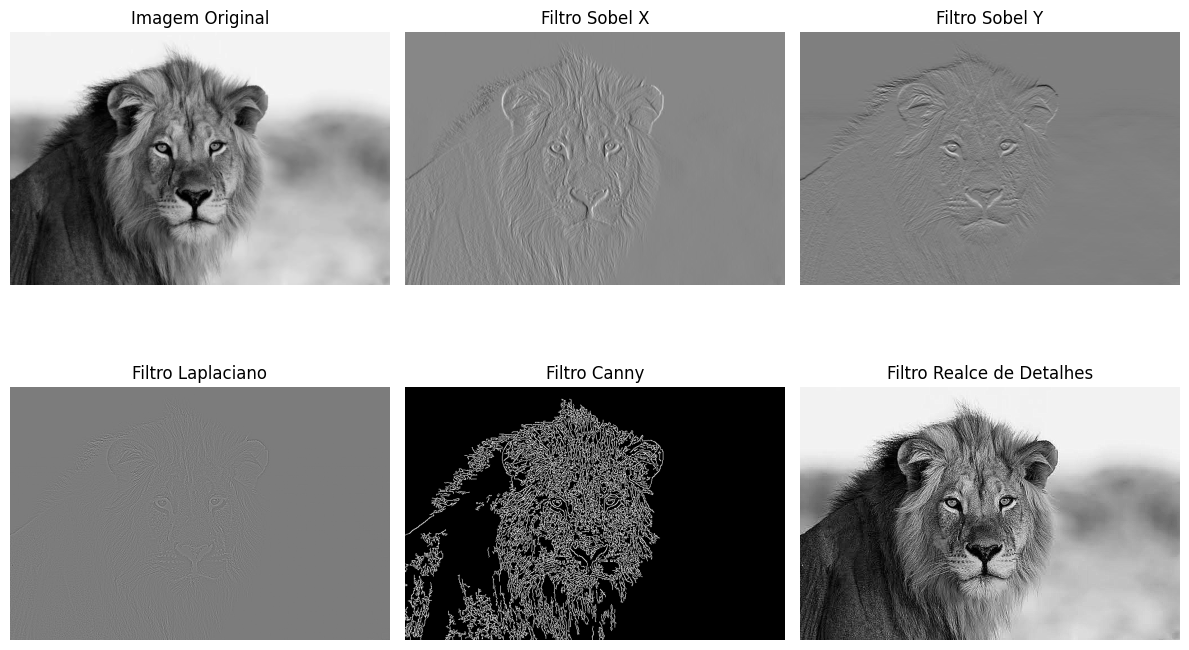

In [ ]:
# Carregar imagem (substitua pelo caminho da sua imagem)
imagem = cv2.imread("imagem.jpg", cv2.IMREAD_GRAYSCALE)  # Carregar em escala de cinza

# Aplicar diferentes filtros
sobel_x = cv2.Sobel(imagem, cv2.CV_64F, 1, 0, ksize=3)  # Sobel horizontal
sobel_y = cv2.Sobel(imagem, cv2.CV_64F, 0, 1, ksize=3)  # Sobel vertical
laplaciano = cv2.Laplacian(imagem, cv2.CV_64F)  # Laplaciano
canny = cv2.Canny(imagem, 50, 150)  # Canny Edge Detection
gaussian = cv2.GaussianBlur(imagem, (5,5), 0)  # Suavização Gaussiana

# Criar um filtro personalizado (realce de detalhes)
kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1], 
                   [0, -1, 0]])
realce = cv2.filter2D(imagem, -1, kernel)

# Exibir resultados lado a lado
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs[0, 0].imshow(imagem, cmap="gray"); axs[0, 0].set_title("Imagem Original")
axs[0, 1].imshow(sobel_x, cmap="gray"); axs[0, 1].set_title("Filtro Sobel X")
axs[0, 2].imshow(sobel_y, cmap="gray"); axs[0, 2].set_title("Filtro Sobel Y")
axs[1, 0].imshow(laplaciano, cmap="gray"); axs[1, 0].set_title("Filtro Laplaciano")
axs[1, 1].imshow(canny, cmap="gray"); axs[1, 1].set_title("Filtro Canny")
axs[1, 2].imshow(realce, cmap="gray"); axs[1, 2].set_title("Filtro Realce de Detalhes")

for ax in axs.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()